# Task 1

In [1]:
import pandas as pd
import numpy as np

Reading in the CSV files with Pandas

In [3]:
adm_df = pd.read_csv('Admissions.csv')
lab_df = pd.read_csv('Lab.csv')

In [5]:
trans_df = pd.read_csv('Transfusions.csv')

In [6]:
adm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5231 entries, 0 to 5230
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   admission_id                5231 non-null   int64  
 1   patient_id                  5231 non-null   int64  
 2   admission_date              5231 non-null   object 
 3   admission_time              4535 non-null   object 
 4   discharge_date              5231 non-null   object 
 5   discharge_time              5231 non-null   object 
 6   hospital                    5231 non-null   object 
 7   age                         4604 non-null   float64
 8   sex                         5231 non-null   object 
 9   charlson_comorbidity_index  4970 non-null   object 
 10  lap_score                   5231 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 449.7+ KB


Observations:
    I can already see that "admission_time" was quite a few missing values (NaN). So does "age", and "charlson_comorbidity_index".
    
   admission_date, admission_time, discharge_date, discharge_time are not properly formatted, as they are objects, not datetime.
   
   We can see some descriptive statistics in the output of the .describe() function call

In [7]:
adm_df.head()

,admission_id,patient_id,admission_date,admission_time,discharge_date,discharge_time,hospital,age,sex,charlson_comorbidity_index,lap_score
0,3602,34208,2011-09-07,NaN,09/11/2011,13:16,St. Joseph's Health Centre,NaN,M,1,45
1,2790,90930,2008-07-22,06:19,07/24/2008,17:54,St. Michael's Hospital,48.0,M,1,46
2,8755,97765,2002-08-24,14:28,08/27/2002,08:14,Mount Sinai Hospital,59.0,F,0,35
3,9260,17941,2007-01-12,09:39,01/26/2007,11:10,Sunnybrook Health Sciences Centre,57.0,M,1,18
4,5317,36532,2003-09-24,13:37,10/12/2003,16:23,Toronto Western Hospital,51.0,F,1,21


In [12]:
adm_df.describe()

,admission_id,patient_id,age,lap_score
count,5231.000000,5231.000000,4604.00000,5231.000000
mean,5512.069776,54170.202829,54.94874,27.528197
std,2584.436372,26121.399502,5.05146,21.423248
min,1003.000000,10017.000000,38.00000,0.000000
25%,3280.500000,30970.000000,51.00000,11.000000
50%,5501.000000,54736.000000,55.00000,23.000000
75%,7760.500000,76768.500000,58.00000,40.000000
max,9997.000000,99984.000000,74.00000,136.000000


In [9]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   admission_id  3609 non-null   int64  
 1   test_name     3609 non-null   object 
 2   test_code     3609 non-null   object 
 3   result_unit   3609 non-null   object 
 4   result_value  3609 non-null   float64
 5   result_date   3609 non-null   object 
 6   result_time   3609 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 197.5+ KB


In [10]:
lab_df.describe()

,admission_id,result_value
count,3609.000000,3609.000000
mean,5451.744250,81.539762
std,2609.854333,94.470176
min,1003.000000,0.000000
25%,3194.000000,3.600000
50%,5413.000000,48.600000
75%,7715.000000,140.900000
max,9997.000000,584.400000


Observation: '
    no missing values in lab_df
    admission_id seems to be randomly generated
    result value is float, which is good

In [11]:
lab_df.head()

,admission_id,test_name,test_code,result_unit,result_value,result_date,result_time
0,4416,Albumin,ALB,g/dL,4.1,2003-08-19,02:25
1,4636,Platelet Count,PLT,E9/L,295.0,2012-02-05,01:42
2,8041,Hemoglobin,RBC,g/L,165.4,2004-04-18,08:05
3,7384,Chloride plasma,CLPL,mmol/L,193.0,2000-04-04,14:55
4,2604,Albumin,ALB,g/dL,6.0,2008-02-01,11:30


In [13]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   admission_id          657 non-null    int64 
 1   issue_date            657 non-null    object
 2   issue_time            657 non-null    object
 3   rbc_transfusion       657 non-null    bool  
 4   platelet_transfusion  657 non-null    bool  
 5   plasma_transfusion    657 non-null    bool  
dtypes: bool(3), int64(1), object(2)
memory usage: 17.4+ KB


In [14]:
trans_df.describe()

,admission_id
count,657.000000
mean,5561.634703
std,2577.215753
min,1010.000000
25%,3408.000000
50%,5619.000000
75%,7760.000000
max,9997.000000


# Task 2

In [16]:
first_two = adm_df.merge(lab_df, on='admission_id', how='left')

In [17]:
all_df = first_two.merge(trans_df, on='admission_id', how='left')

In [18]:
first_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231 entries, 0 to 5230
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   admission_id                5231 non-null   int64  
 1   patient_id                  5231 non-null   int64  
 2   admission_date              5231 non-null   object 
 3   admission_time              4535 non-null   object 
 4   discharge_date              5231 non-null   object 
 5   discharge_time              5231 non-null   object 
 6   hospital                    5231 non-null   object 
 7   age                         4604 non-null   float64
 8   sex                         5231 non-null   object 
 9   charlson_comorbidity_index  4970 non-null   object 
 10  lap_score                   5231 non-null   int64  
 11  test_name                   3609 non-null   object 
 12  test_code                   3609 non-null   object 
 13  result_unit                 3609 

In [19]:
first_two.head()

,admission_id,patient_id,admission_date,admission_time,discharge_date,discharge_time,hospital,age,sex,charlson_comorbidity_index,lap_score,test_name,test_code,result_unit,result_value,result_date,result_time
0,3602,34208,2011-09-07,NaN,09/11/2011,13:16,St. Joseph's Health Centre,NaN,M,1,45,NaN,NaN,NaN,NaN,NaN,NaN
1,2790,90930,2008-07-22,06:19,07/24/2008,17:54,St. Michael's Hospital,48.0,M,1,46,Albumin,ALB,g/dL,2.2,2008-07-22,16:45
2,8755,97765,2002-08-24,14:28,08/27/2002,08:14,Mount Sinai Hospital,59.0,F,0,35,Albumin,ALB,g/dL,1.8,2002-08-26,15:27
3,9260,17941,2007-01-12,09:39,01/26/2007,11:10,Sunnybrook Health Sciences Centre,57.0,M,1,18,Hemoglobin,RBC,g/L,172.1,2007-01-12,20:10
4,5317,36532,2003-09-24,13:37,10/12/2003,16:23,Toronto Western Hospital,51.0,F,1,21,Albumin,ALB,g/dL,2.5,2003-09-27,19:31


Let's see how does the merged df look like

In [20]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231 entries, 0 to 5230
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   admission_id                5231 non-null   int64  
 1   patient_id                  5231 non-null   int64  
 2   admission_date              5231 non-null   object 
 3   admission_time              4535 non-null   object 
 4   discharge_date              5231 non-null   object 
 5   discharge_time              5231 non-null   object 
 6   hospital                    5231 non-null   object 
 7   age                         4604 non-null   float64
 8   sex                         5231 non-null   object 
 9   charlson_comorbidity_index  4970 non-null   object 
 10  lap_score                   5231 non-null   int64  
 11  test_name                   3609 non-null   object 
 12  test_code                   3609 non-null   object 
 13  result_unit                 3609 

Find percentage of missing values

Quickly looked it up on stackOverflow to not waste time figuring it out myself
https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

In [24]:
percent_missing = all_df.isnull().sum() * 100 / len(all_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [25]:
missing_value_df

,percent_missing
admission_id,0.000000
patient_id,0.000000
admission_date,0.000000
admission_time,13.305295
discharge_date,0.000000
discharge_time,0.000000
hospital,0.000000
age,11.986236
sex,0.000000
charlson_comorbidity_index,4.989486


In [27]:
#Quick test let's say for rbc_transfusion
100 - (657 / 5231) * 100

87.44025998852992

It works !! Good enough for now. Let's quickly move on to Task 3, since I have 1.5 h left only

# Task 3

TO DO:	Create a new length_of_stay variable defined as discharge date and time minus admission date and time (in unrounded days). Print the mean length_of_stay for each hospital.

In [48]:
all_df.head()

,admission_id,patient_id,admission_date,admission_time,discharge_date,discharge_time,hospital,age,sex,charlson_comorbidity_index,...,test_code,result_unit,result_value,result_date,result_time,issue_date,issue_time,rbc_transfusion,platelet_transfusion,plasma_transfusion
0,3602,34208,2011-09-07,NaN,09/11/2011,13:16,St. Joseph's Health Centre,NaN,M,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2790,90930,2008-07-22,06:19,07/24/2008,17:54,St. Michael's Hospital,48.0,M,1,...,ALB,g/dL,2.2,2008-07-22,16:45,NaN,NaN,NaN,NaN,NaN
2,8755,97765,2002-08-24,14:28,08/27/2002,08:14,Mount Sinai Hospital,59.0,F,0,...,ALB,g/dL,1.8,2002-08-26,15:27,2002-08-25,16:05,False,False,True
3,9260,17941,2007-01-12,09:39,01/26/2007,11:10,Sunnybrook Health Sciences Centre,57.0,M,1,...,RBC,g/L,172.1,2007-01-12,20:10,NaN,NaN,NaN,NaN,NaN
4,5317,36532,2003-09-24,13:37,10/12/2003,16:23,Toronto Western Hospital,51.0,F,1,...,ALB,g/dL,2.5,2003-09-27,19:31,NaN,NaN,NaN,NaN,NaN


In [39]:
import math

True


Pseudo code: 
length of stay = discharge date and time - minus admission date and time

Let's make a datetime out of those objects

Let's try - Approach #1

In [46]:
import math

for index, row in all_df.iterrows():
    try:
        if math.isnan(float(row['admission_time'])):
            row['admission_datetime_str'] = row['admission_date'] + ' ' + '00:00'
    except ValueError:  # could not convert string to float: '13:16' ... which means that it's a correct time
        row['admission_datetime_str'] = row['admission_date'] + ' ' + row['admission_time']
        
    try:
        if math.isnan(float(row['discharge_time'])):
            row['discharge_datetime_str'] = row['discharge_date'] + ' ' + '00:00'
    except ValueError:
        row['discharge_datetime_str'] = row['discharge_date'] + ' ' + row['discharge_time']
    

This did not fully work, but I think I got the right idea, I just need to store it differently

Let's try again: -- Approach #2

In [52]:
admission_datetime_str = []
discharge_datetime_str = []

for index, row in all_df.iterrows():
    try:
        if math.isnan(float(row['admission_time'])):
            admission_datetime_str.append(row['admission_date'] + ' ' + '00:00')
    except ValueError:  # could not convert string to float: '13:16' ... which means that it's a correct time
        admission_datetime_str.append(row['admission_date'] + ' ' + row['admission_time'])
        
    try:
        if math.isnan(float(row['discharge_time'])):
            discharge_datetime_str.append(row['discharge_date'] + ' ' + '00:00')
    except ValueError:
        discharge_datetime_str.append(row['discharge_date'] + ' ' + row['discharge_time'])

In [53]:
len(admission_datetime_str)

5231

In [54]:
admission_datetime_str[0:10]

['2011-09-07 00:00',
 '2008-07-22 06:19',
 '2002-08-24 14:28',
 '2007-01-12 09:39',
 '2003-09-24 13:37',
 '2014-12-08 20:02',
 '2001-11-18 21:36',
 '2010-06-17 00:00',
 '2003-11-02 14:16',
 '2010-12-22 15:22']

In [59]:
print(len(discharge_datetime_str))

5231


In [60]:
discharge_datetime_str[0:10]

['09/11/2011 13:16',
 '07/24/2008 17:54',
 '08/27/2002 08:14',
 '01/26/2007 11:10',
 '10/12/2003 16:23',
 '12/13/2014 02:53',
 '12/07/2001 23:49',
 '07/03/2010 15:52',
 '11/07/2003 10:49',
 '12/29/2010 15:18']

In [62]:
all_df['admission_datetime_str'] = pd.Series(admission_datetime_str, index = all_df.index)
all_df['discharge_datetime_str'] = pd.Series(discharge_datetime_str, index = all_df.index)

Now I added the string formatted datetimes to the data frame... I just need to convert them to datatime, then subtract... not enough time. Only 50 minutes left.. I will skip this now and hoepfully come back to it later

This is how you would convert:

import datetime
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M')

I wasted a lot of time with this adn It did not work, so I am trying a different approach. Approach #3

In [76]:
# Let's fill in the NAs
adm_df['admission_time'] = adm_df['admission_time'].fillna(adm_df['admission_time'].value_counts().index[0])
adm_df['admission_date'] = adm_df['admission_date'].fillna(adm_df['admission_date'].value_counts().index[0])


# Let's merge again
all_df = adm_df.merge(lab_df, how='left', on='admission_id')
all_df = all_df.merge(trans_df, how='left', on='admission_id')


hospital
Mount Sinai Hospital                11 days 05:52:47.176781002
St. Joseph's Health Centre          10 days 11:44:52.931034482
St. Michael's Hospital              10 days 17:47:57.154989384
Sunnybrook Health Sciences Centre   11 days 00:07:46.744730679
Toronto Western Hospital            11 days 03:35:16.897506925
Name: length_of_stay, dtype: timedelta64[ns]

In [77]:
length_of_stay = pd.to_datetime(all_df.apply(lambda x: x['discharge_date'] +" "+ x['discharge_time'], axis=1)) -  pd.to_datetime(all_df.apply(lambda x: x['admission_date'] +" "+ x['admission_time'], axis=1))

all_df['length_of_stay'] = length_of_stay.values.astype(np.int64)
pd.to_timedelta(all_df.groupby('hospital').mean()['length_of_stay'])

hospital
Mount Sinai Hospital                11 days 05:52:47.176781002
St. Joseph's Health Centre          10 days 11:44:52.931034482
St. Michael's Hospital              10 days 17:47:57.154989384
Sunnybrook Health Sciences Centre   11 days 00:07:46.744730679
Toronto Western Hospital            11 days 03:35:16.897506925
Name: length_of_stay, dtype: timedelta64[ns]

It worked now! Let's move on. Only 35 minutes left.

# Task 4

Impute the missing age and charlson_comorbidity_index values in any way you see fit. Briefly explain how the imputation method(s) might affect a statistical model that uses these variables as predictors.

In [56]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231 entries, 0 to 5230
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   admission_id                5231 non-null   int64  
 1   patient_id                  5231 non-null   int64  
 2   admission_date              5231 non-null   object 
 3   admission_time              4535 non-null   object 
 4   discharge_date              5231 non-null   object 
 5   discharge_time              5231 non-null   object 
 6   hospital                    5231 non-null   object 
 7   age                         4604 non-null   float64
 8   sex                         5231 non-null   object 
 9   charlson_comorbidity_index  4970 non-null   object 
 10  lap_score                   5231 non-null   int64  
 11  test_name                   3609 non-null   object 
 12  test_code                   3609 non-null   object 
 13  result_unit                 3609 

In [57]:
all_df_copy = all_df.copy()

all_df_copy['age'].fillna((all_df_copy['age'].mean()), inplace=True)

In [58]:
all_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231 entries, 0 to 5230
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   admission_id                5231 non-null   int64  
 1   patient_id                  5231 non-null   int64  
 2   admission_date              5231 non-null   object 
 3   admission_time              4535 non-null   object 
 4   discharge_date              5231 non-null   object 
 5   discharge_time              5231 non-null   object 
 6   hospital                    5231 non-null   object 
 7   age                         5231 non-null   float64
 8   sex                         5231 non-null   object 
 9   charlson_comorbidity_index  4970 non-null   object 
 10  lap_score                   5231 non-null   int64  
 11  test_name                   3609 non-null   object 
 12  test_code                   3609 non-null   object 
 13  result_unit                 3609 

It worked. I replaces NA's with the average age, since I could not think out anything quicker that does not rely on a linear model to predict the age. This will affect the stats. model significanly, since the age values will be pulled more towards the mean, introducing bias.

Anyways, I will do this on the original all_df as well.

In [78]:
all_df['age'].fillna((all_df['age'].mean()), inplace=True)

In [79]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231 entries, 0 to 5230
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   admission_id                5231 non-null   int64  
 1   patient_id                  5231 non-null   int64  
 2   admission_date              5231 non-null   object 
 3   admission_time              5231 non-null   object 
 4   discharge_date              5231 non-null   object 
 5   discharge_time              5231 non-null   object 
 6   hospital                    5231 non-null   object 
 7   age                         5231 non-null   float64
 8   sex                         5231 non-null   object 
 9   charlson_comorbidity_index  4970 non-null   object 
 10  lap_score                   5231 non-null   int64  
 11  test_name                   3609 non-null   object 
 12  test_code                   3609 non-null   object 
 13  result_unit                 3609 

Age fill-na worked

For the charlson-comorbidity-index I quickly found 1 website: https://www.mdcalc.com/charlson-comorbidity-index-cci

saying that:
 - for <50 years charlson-comorbidity-index = 0
 - for 50–59 years charlson-comorbidity-index = +1
 - for 60–69 years charlson-comorbidity-index = +2
 - for 70–79 years charlson-comorbidity-index = +3
 - for ≥80 years charlson-comorbidity-index = +4
 
 If I have time, I will come back an implement this too. I only have 40 minutes left, so I will move on to complete more questions. This could be easily implemented with an iteration over the missing values and if-else statements to decide the value

# Task 5

In patients with multiple admissions, keep only their first admission (by datetime). Print the median admission_date of all rows

In [86]:
first_only = all_df.groupby('patient_id', as_index=False)['admission_date'].min()
processed = all_df.merge(first_only, how='right', left_on='patient_id', right_index=True)

processed['patient_id'].value_counts()

2047    1
4663    1
557     1
4655    1
2608    1
       ..
3251    1
1206    1
3255    1
1210    1
0       1
Name: patient_id, Length: 5083, dtype: int64

Now let's print the medians:

In [ ]:
print()

# Task 6

In [69]:
with_transf = all_df[all_df['rbc_transfusion']==True]
without_transf = all_df[all_df['rbc_transfusion']==False]

Due to the overlap of the distributions of people with and without a transfussion, the difference of mean ages between the people with and without a rbc transfussion is 3 years, while in average, there is a difference of approximately 5 people (that had or not a transfussion) for each age category. For the range 56-63, there are significantly more people with a transfussion, according to the bar plot below.

Age Plots

AxesSubplot(0.125,0.125;0.775x0.755)


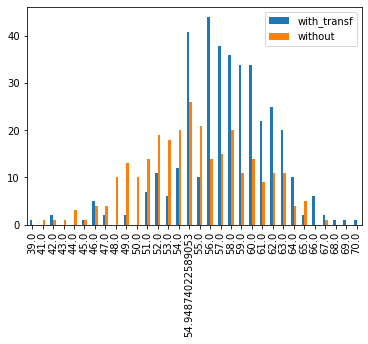

In [71]:
age_df = pd.DataFrame({'with_transf': with_transf['age'].value_counts(), 'without': without_transf['age'].value_counts()})
print(age_df.plot.bar())

In [80]:
print("Mean differences:", (with_transf['age'].value_counts() - without_transf['age'].value_counts()).mean())

Mean differences: 5.0


In [81]:
print("Mean age with transf:", with_transf['age'].mean())
print("Mean age without transf:", without_transf['age'].mean())

Mean age with transf: 57.741750928887
Mean age without transf: 55.05931404225322


<AxesSubplot:>

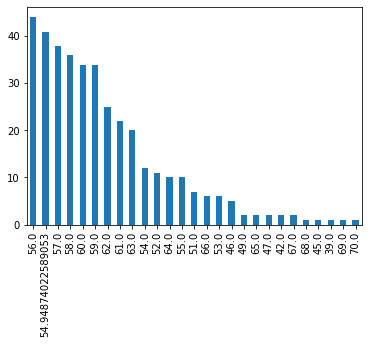

In [82]:
with_transf['age'].value_counts().plot(kind='bar')

Now let's run a hypothesis test to see if there is a difference between the 2 groups. We need an independent samples t-test which compares the means for the 2 groups

In [87]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(with_transf['age'], without_transf['age'])

In [88]:
print(p_value)

9.944790702733041e-14


P value is really small, so we fail to reject the null hypothesis of the two groups being the same

H-null = with_transf == without_transf
H-alternative: with_transf != without_transf

# Task 7

In [89]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [90]:
linear_regressor = LinearRegression()
all_df['sex'].replace(0, 'F',inplace=True)
all_df['sex'].replace(1, 'M',inplace=True)
all_df.head()

,admission_id,patient_id,admission_date,admission_time,discharge_date,discharge_time,hospital,age,sex,charlson_comorbidity_index,...,result_unit,result_value,result_date,result_time,issue_date,issue_time,rbc_transfusion,platelet_transfusion,plasma_transfusion,length_of_stay
0,3602,34208,2011-09-07,18:23,09/11/2011,13:16,St. Joseph's Health Centre,54.94874,M,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327180000000000
1,2790,90930,2008-07-22,06:19,07/24/2008,17:54,St. Michael's Hospital,48.00000,M,1,...,g/dL,2.2,2008-07-22,16:45,NaN,NaN,NaN,NaN,NaN,214500000000000
2,8755,97765,2002-08-24,14:28,08/27/2002,08:14,Mount Sinai Hospital,59.00000,F,0,...,g/dL,1.8,2002-08-26,15:27,2002-08-25,16:05,False,False,True,236760000000000
3,9260,17941,2007-01-12,09:39,01/26/2007,11:10,Sunnybrook Health Sciences Centre,57.00000,M,1,...,g/L,172.1,2007-01-12,20:10,NaN,NaN,NaN,NaN,NaN,1215060000000000
4,5317,36532,2003-09-24,13:37,10/12/2003,16:23,Toronto Western Hospital,51.00000,F,1,...,g/dL,2.5,2003-09-27,19:31,NaN,NaN,NaN,NaN,NaN,1565160000000000


In [91]:
dependent = all_df[['age', 'sex', 'hospital']]
independent = all_df['result_value']
linear_regressor.fit(dependent, independent)
Y_pred = linear_regressor.predict(dependent)

ValueError: could not convert string to float: 'M'